## Lab | Data cleaning and wrangling

- Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from statsmodels.graphics.mosaicplot import mosaic

- Importing the dataset

In [7]:
df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv',sep=",")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
#dropping customer
df = df.drop("Customer", axis=1)

In [9]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


 - We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [4]:
#First lets define the categorical and numerical columns
numerical_df = customer_df.select_dtypes(np.number)
categorical_df = customer_df.select_dtypes(np.object)

In [10]:
#Camille gave me the following feedback : Why do you plot the the boxplots of all the numerical columns in one plot? You can create a loop or a function that do it one by one for each column or even set a grid
#I think because of this :
numeric_col = ['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']
categorical_col = ['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

<Axes: >

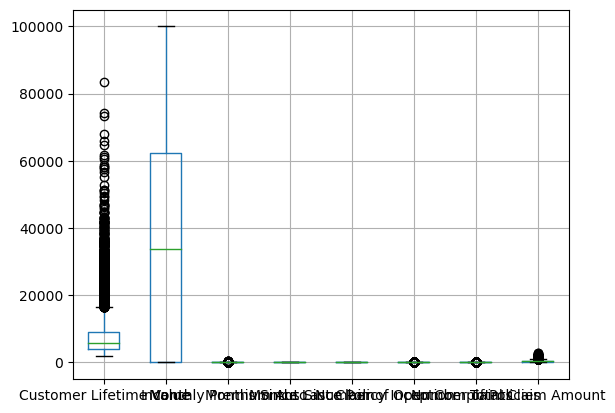

In [11]:
df.boxplot(numeric_col)

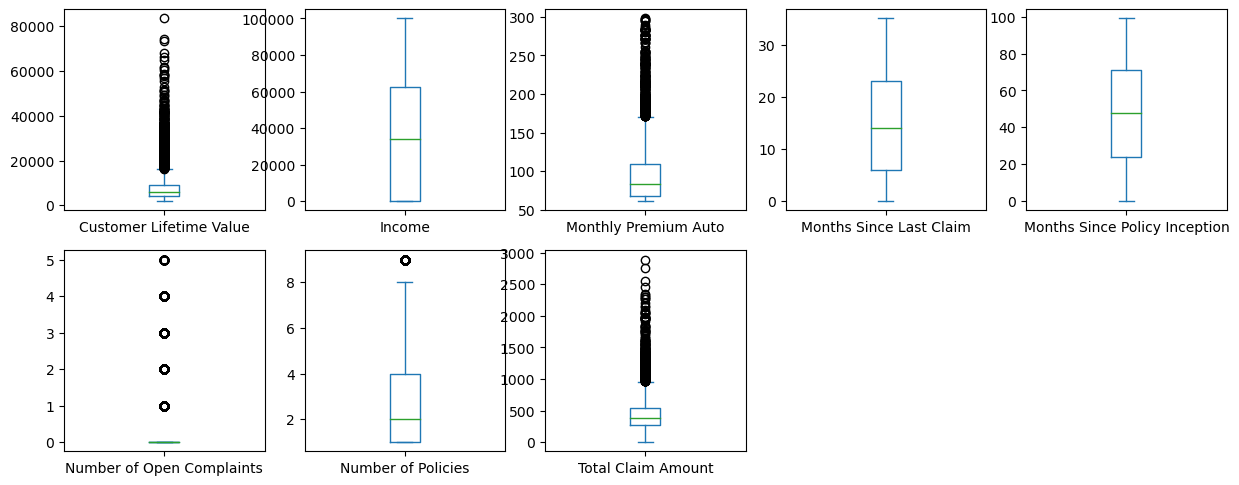

In [15]:
#but this is better 
numeric_columns = df.select_dtypes(include='number')
numeric_columns_df = pd.DataFrame(numeric_columns)
numeric_columns_df.plot(kind='box', subplots=True, layout=(4, 5), figsize=(15, 12))
plt.show()

In [16]:
for x in ['Customer Lifetime Value']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [17]:
#The outliers are replaced with nan, now checking the sum of null
df.isnull().sum()

State                              0
Customer Lifetime Value          817
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
EmploymentStatus                   0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim            0
Months Since Policy Inception      0
Number of Open Complaints          0
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
dtype: int64

In [18]:
#dropping the nulls
df = df.dropna(axis = 0)

In [19]:
#rechecking
df.isnull().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

 - Create a copy of the dataframe for the data wrangling.

In [20]:
copy = df.copy()
copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,Suburban,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


 - Normalize the continuous variables. You can use any one method you want.

In [21]:
numericals_copy = copy.select_dtypes(include = np.number)
categoricals_copy = copy.select_dtypes(include = np.object)

target = copy['Total Claim Amount']

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
transformer = MinMaxScaler().fit(numericals_copy)
num_minmax = transformer.transform(numericals_copy)
num_norm = pd.DataFrame(num_minmax,columns=numericals_copy.columns)
num_normalize = num_norm.copy()

 - Encode the categorical variables

In [25]:
categoricals = pd.get_dummies(categoricals_copy)
categoricals

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
9130,0,1,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
9132,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


 - The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [26]:
copy['Effective To Date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9128     1/6/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: Effective To Date, Length: 8317, dtype: object

In [27]:
print(copy.dtypes)

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object


In [28]:
#converting
copy['Effective To Date'] = pd.to_datetime(copy['Effective To Date'])

In [29]:
print(copy.dtypes)

State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                            object
Total Claim Amount                      

In [34]:
#Camille's feedback was this one : The last question asks you to extract the Day and the Month from the effective to date column, to create two new columns, one with the Day and one with the Month. Then you can drop the effective to date column as you've already extracted the useful information from it.
#Extracting the day of the week and month as separate columns
copy['Day'] = copy['Effective To Date'].dt.day
copy['Month'] = copy['Effective To Date'].dt.month

In [35]:
#checking if we have the new columns
copy

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Day of Week,Day,Month
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,3,24,2
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,31,1
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,5,19,2
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3,20,1
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,2011-01-06,Employed,F,47761,Suburban,...,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,3,6,1
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,5,12,2
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,6,2
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,3,2


In [36]:
#dropping effective to date
copy.drop('Effective To Date', axis=1, inplace=True)

In [37]:
copy

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Day of Week,Day,Month
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,3,24,2
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,31,1
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,5,19,2
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3,20,1
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,...,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large,3,6,1
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,5,12,2
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,6,2
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,3,2
